In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Success rate in physical deception

Table 4 in (Lowe et al. 2018) lists success rates for the physical deception scenario (called "simple_adversary" in the code). We look at the last frame of an episode and say that the adversary succeeds if its distance from the goal is less than some threshold $\varepsilon$, and the agents succeed if at least one of them is within $\varepsilon$ distance of the goal.

We compute success rate by averaging over ~1000 episodes using a model that's been trained for 60k episodes.

In [2]:
file = open('experiments/simple_adversary/benchmark.pkl', 'rb')
data = pickle.load(file)
file.close()
adversary = [e[0][-1][0] for e in data]
agent = [min(e[0][-1][1][2], e[0][-1][2][2]) for e in data]

def succ_helper(dd, e):
  return len([d for d in dd if d < e**2]) * 1.0 / len(dd)

def succ(e):
  print("AG succ: %f     ADV succ: %f" % (succ_helper(agent, e), succ_helper(adversary, e)))

You can try various values of $\varepsilon$.

In [ ]:
succ(0.3)

Graph of various values of $\varepsilon$:

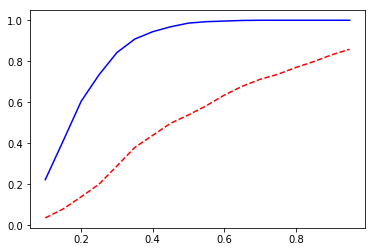

In [10]:
x = np.arange(.1, 1, .05)
y = [succ_helper(agent, x_) for x_ in x]
z = [succ_helper(adversary, x_) for x_ in x]
plt.plot(x, y, 'b')
plt.plot(x, z, 'r', linestyle='dashed')